<a href="https://colab.research.google.com/github/shreehere/Final-Project/blob/main/Breast_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BREAST CANCER PREDICTION

#DATA INFORMATION
Breast Cancer is the most common among women and it is the second leading cause of cancer death in United States. Breast cancer occurs when there is an abnormal growth of the breast tissue which is generally called as a tumor. But not all the tumors are cancerous. It can be non-cancerous too. Those tumors can be of the following.

1.   Benign - Not cancerous
2.   Pre-Malignant - Pre-cancerous
3.   Malignant-Cancerous

The diagnosis can be done through tests such as MRI, Mammogram, ultrasound and Biopsy.


# OBJECTIVE
The Objective of this project is to predict whether the patient has Breast cancer or not by using the data taken in diagnosis of the disease. This is a clinical data and we need to come up with the accuracy of not less than 95%. Here we are going to start with analyzing the data and apply some machine learning techniques to create a model.

#DATA SET
The data set "cancer.csv" contains the data of the patients who got their diagnosis for Breast cancer. There are 569 samples consisting of both Malignant and Benign tumor cells. 


*   There are 32 columns and 569 records
*   The first column has the unique ID numbers of the samples
*   The second column has the diagonis with M representing 'Malignant' and B representing 'Benign'.
*   The rest of the columns consists of the diagnosed value computed from the cell nuclei which we are going to use those values to build our model for cancer prediction ie., whether the tumor is benign or malignant.


#Loading Libraries and the Data set

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#Loading the Dataset

data=pd.read_csv("/content/cancer.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


By default, we can see the first 5 rows and the last 5 rows. We can use the data.head() and data.tail() to see the first 5 and last 5 values in the dataset respectively. 

In [ ]:
#To identify the number of rows and columns we can use the shape method

data.shape

(569, 33)

This shows that there are 569 rows and 32 columns in our dataset

The basic summary of the data is displayed using info method. We can see the type of the data of each and every column, the count of non-null values in each column at the end we can also see the memory usage of the data.

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Here we can see there are three data types in the data. The first column as an integer, the second diagnosis column as an object and the rest all as float.

In [ ]:
data.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

'is null' method shows whether has any null value. Clearly there is not null value in the data.

The id column is not useful for the analysis and hence we can drop it 

In [ ]:
data.drop('id',axis=1, inplace=True)
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
data.drop('Unnamed: 32',axis=1, inplace=True)
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Now the data has 569 rows and 31 columns.

We just need to cross check whether the column 'diagnosis' has only 'M' and 'B'. For this we are going to use 'unique' method

In [ ]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

This is clearly a categorical data as it has only two values representing whether it is Malignant or Benign. The machine learning cannot  understand strings so we are going to change it to integers.

Saved the processed data for further analysis

#STEP 2: Exploratory Data Analysis 

The purpose of EDA is to 

*   understand the data better. It helps to understand the tendencies of the data, quality and gives assumptions and the hypothesis of our analysis
*   It is essential to have the overall picture of the data so we will not miss out any aspect of the data. 

We are going to do the following
1)  Descriptive statistics
2)  Data Visualization



#Descirptive Statistics

In [ ]:
# Loading necessary packages and libraries

%matplotlib inline
import matplotlib.pyplot as plt

from scipy.stats import norm
import seaborn as sns

Basic Descriptive Analysis

In [ ]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
data.skew()

<ipython-input-22-b3b431164adb>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

Here the values closer to zero show less skew. 

In [ ]:
observations_diag=data.groupby('diagnosis',axis=0)
pd.DataFrame(observations_diag.size(),columns=['Total number of observations'])

,Total number of observations
diagnosis,
B,357
M,212


This data shows with the 569 records, 357 samples indicates the absence of cancer and the rest 212 indicates the presence of cancer cells

#BAR Chart

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


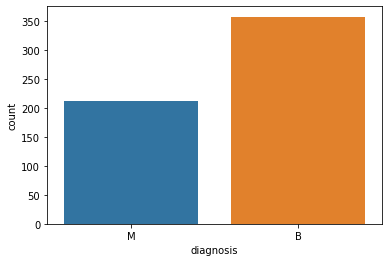

In [ ]:
sns.countplot(data['diagnosis'],label="Total count")

#Distribution of data using Histogram

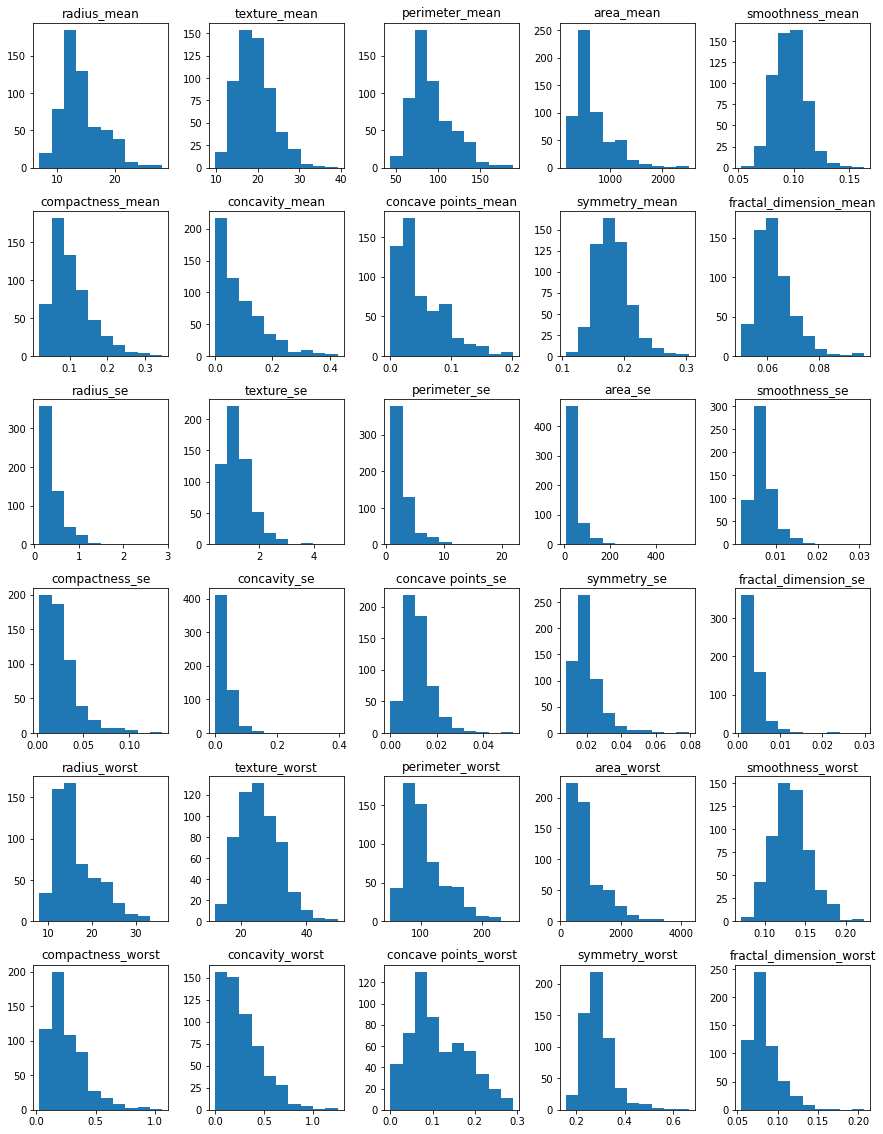

In [ ]:
hist_mean=data.hist(bins=10, figsize=(15,20),grid=False)

We generally assume normal distribution in the input values. Here we can see many of the attributes follow the Gausssian distribution. 

The attributes such as texture, smooth and symmetry follow the Gaussian and some follow exponential distribution

In [ ]:
#Visualization with Denstiy Plot

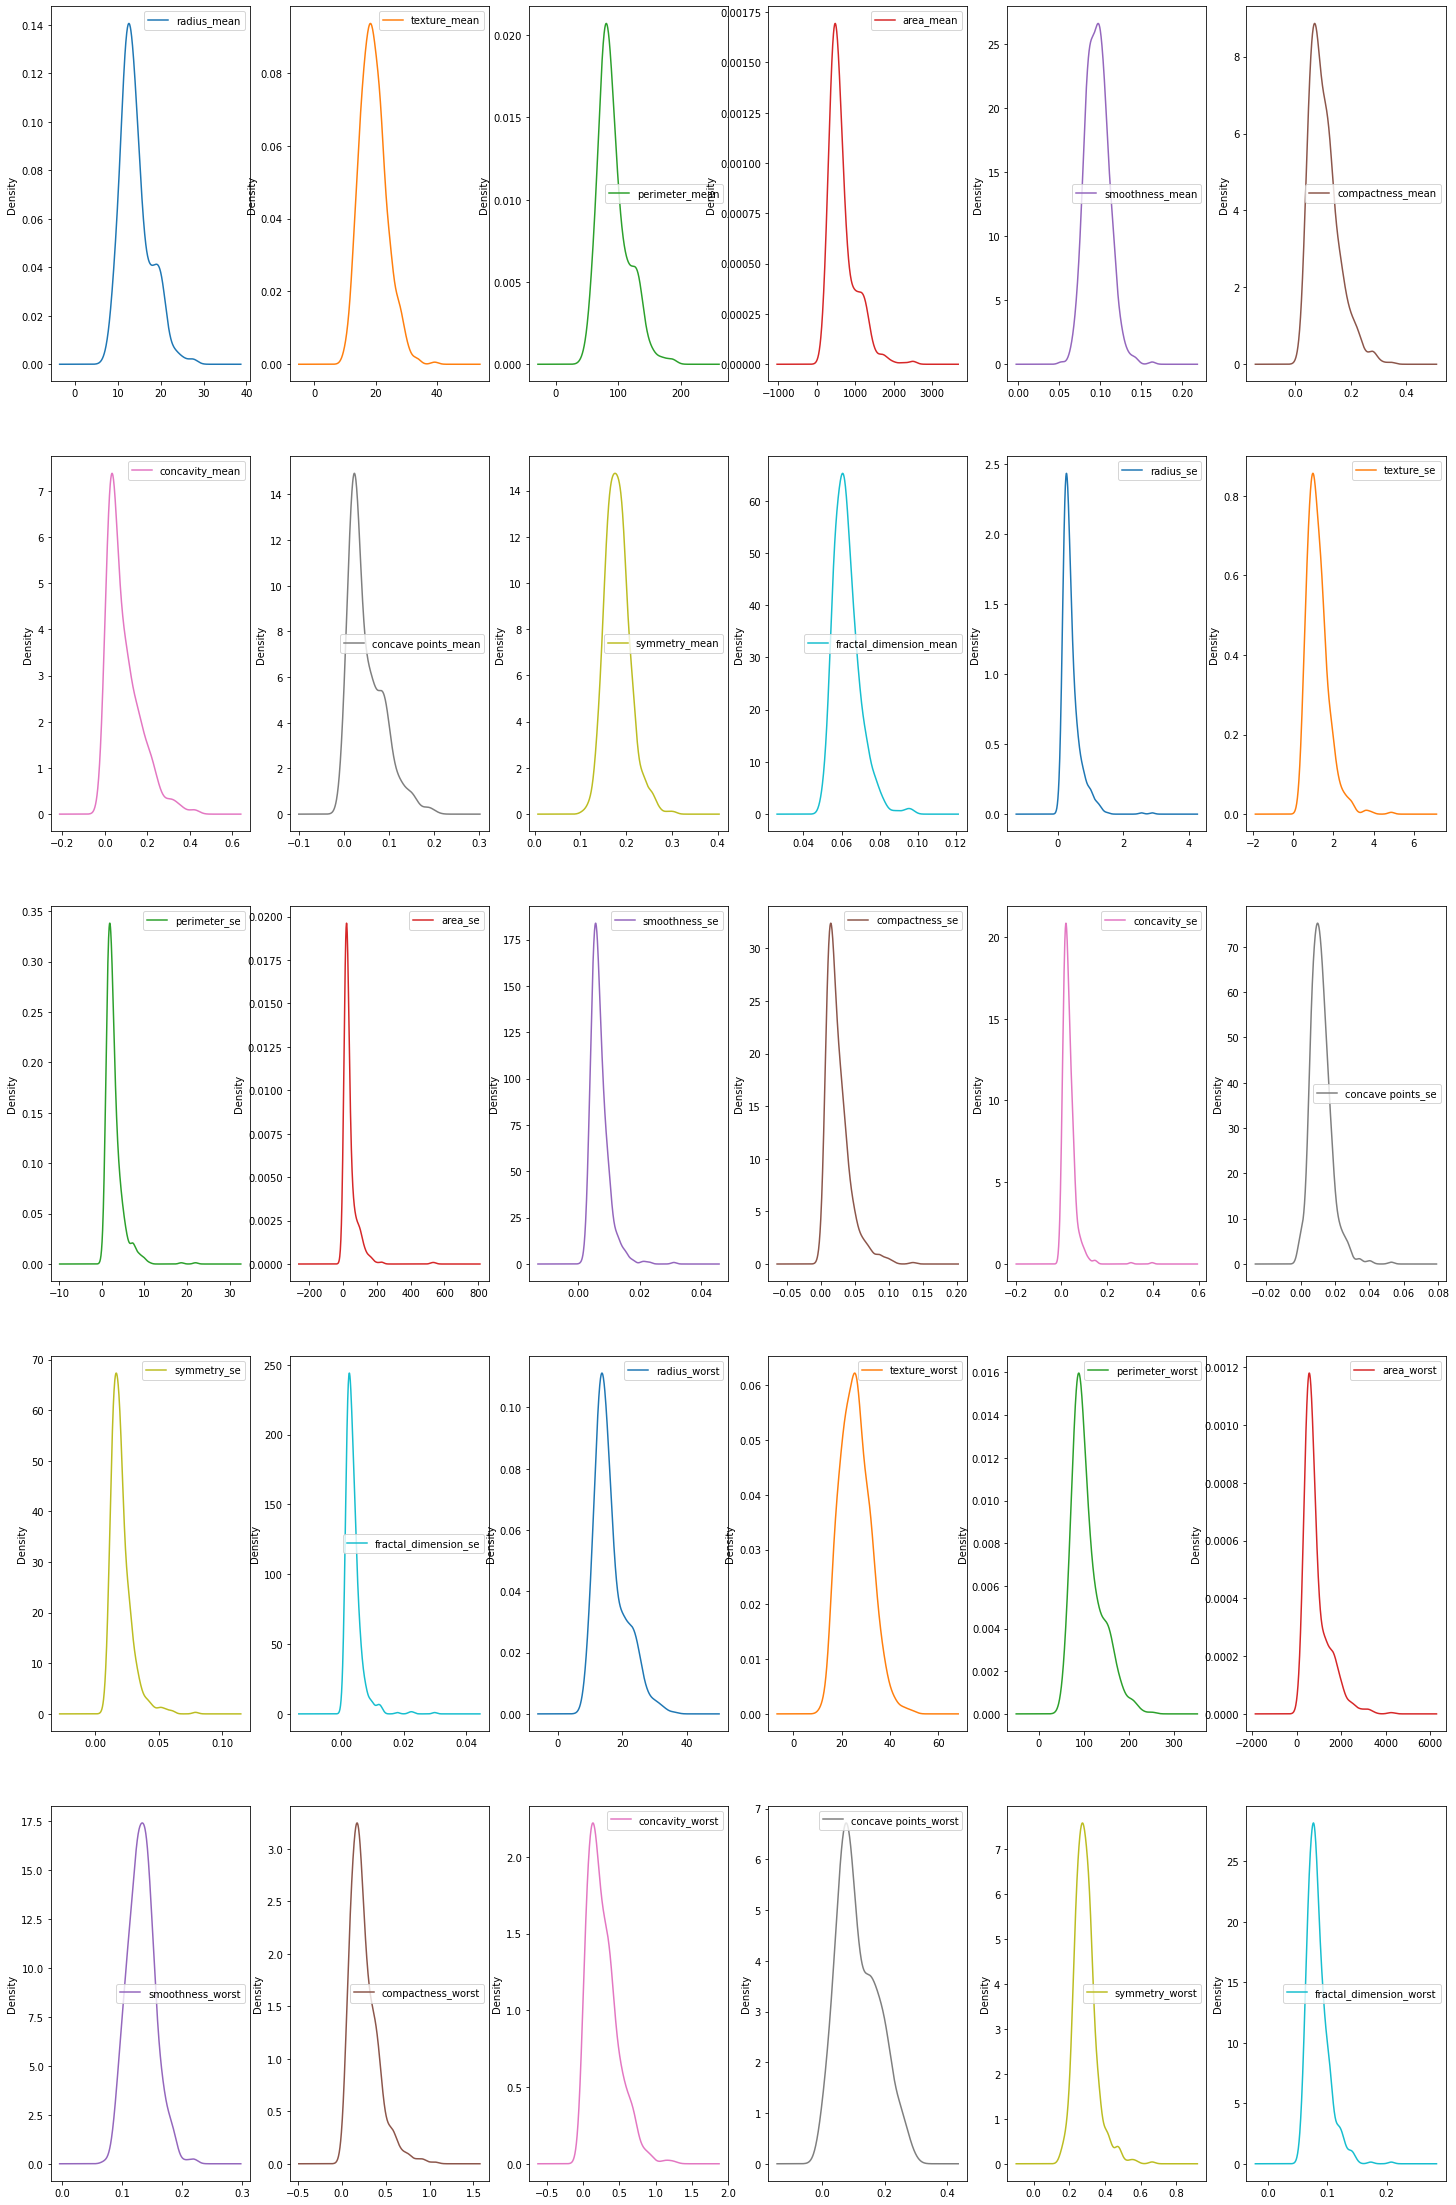

In [ ]:
plt=data.plot(kind='density',subplots=True,layout=(5,6), sharex=False, sharey=False, fontsize=10,figsize=(25,40))

Here also we can see the symmetry, smooth and texture follow the Gaussian distribution. The concavity, perimeter, radius, area follow exponential distribution.

In [ ]:
corr=data.corr()
corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


#Heatmap for the columns with the 'mean' values

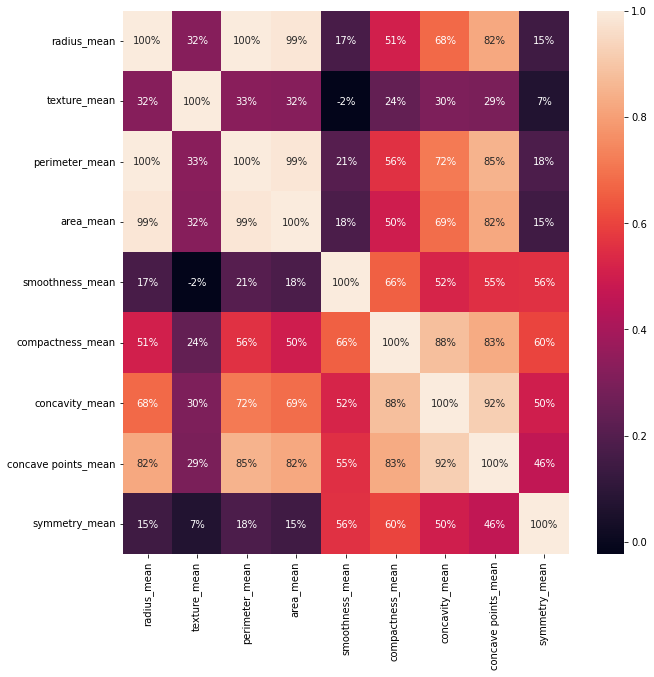

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.iloc[:,1:10].corr(),annot=True,fmt=".0%")

#Heatmap for the columns with the 'se' values

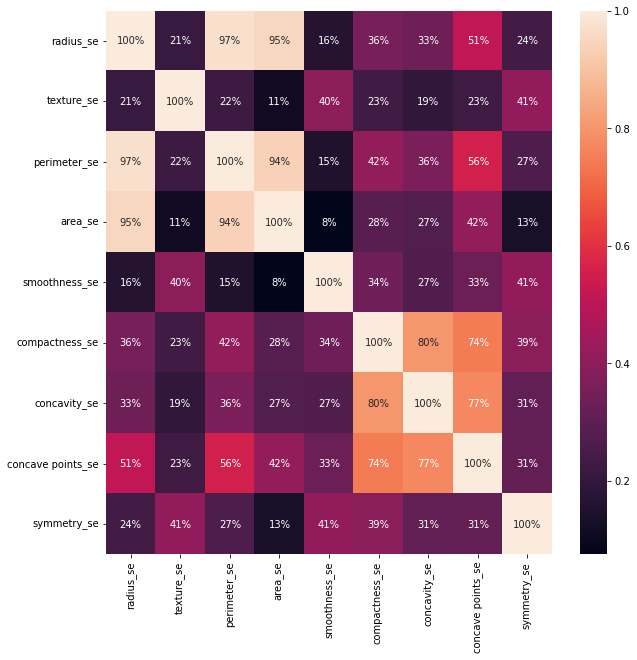

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.iloc[:,11:20].corr(),annot=True,fmt=".0%")

#Heatmap for the columns with the 'worst' values

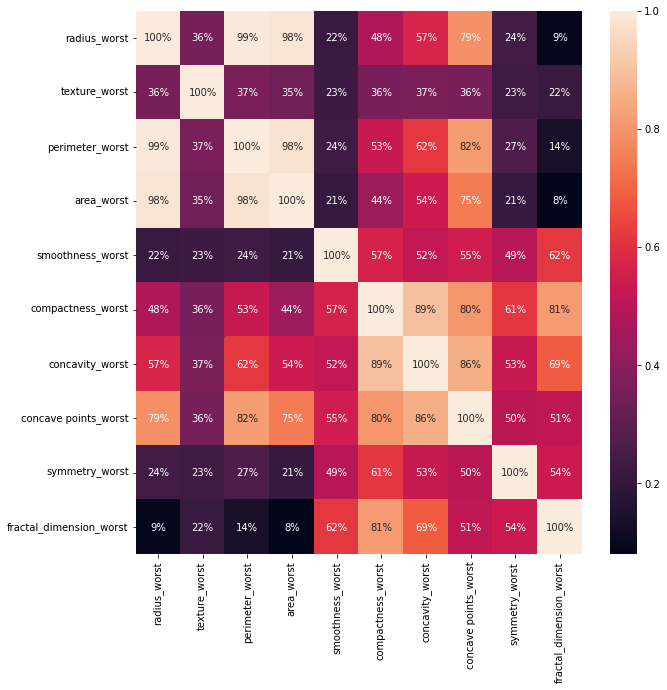

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.iloc[:,21:].corr(),annot=True,fmt=".0%")

#OBSERVATIONS

1)  Histograms does not show any noticable large outliers which requires further clean up

2)   Mean values of the following show higher correlation with malignant tumors
 > Radius
 > Perimeter
 > Area
 > Compactness
 > Concavity
 > Concave points

We can use these attributes in classification of the cancer.

3)  Mean values such as texture, smoothness, symmetry does not show the correlation in diagnosing the cancer.





#STEP 3 : DATA PREPROCESSING

This is an important step. Here we are going to prepare the data to build our model. In general in this phase, the following activities are taken place.

1)  Assigning numerical values to categorical data 
2)  Handling missing values
3)  Normalizing the attribute values to fit the model



All the independent features are assigned to a NumPy array X, and the class labels are transformed to integers

In [ ]:
array=data.values
X=array[:,1:31]
Y=array[:,0]

Using Label encoder to transform the class labels from string to integers

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Y)

#Data split into Test and Train

In [ ]:
from sklearn.model_selection import train_test_split

##Split data set in train 70% and test 30%
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.25, random_state=7)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((426, 30), (426,), (143, 30), (143,))

#Standardization to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalize the  data (center around 0 and scale to remove the variance).
scaler =StandardScaler()
Xs = scaler.fit_transform(X)

Using Principal Component Analysis(PCA) to understand the possible features to use for analysis to get optimal information

In [ ]:
from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components=10)
fit = pca.fit(Xs)

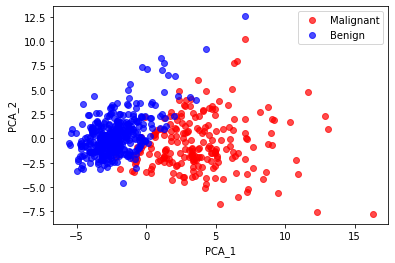

In [ ]:
X_pca = pca.transform(Xs)

PCA_df = pd.DataFrame()

PCA_df['PCA_1'] = X_pca[:,0]
PCA_df['PCA_2'] = X_pca[:,1]

plt.plot(PCA_df['PCA_1'][data.diagnosis == 'M'],PCA_df['PCA_2'][data.diagnosis == 'M'],'o', alpha = 0.7, color = 'r')
plt.plot(PCA_df['PCA_1'][data.diagnosis == 'B'],PCA_df['PCA_2'][data.diagnosis == 'B'],'o', alpha = 0.7, color = 'b')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Malignant','Benign'])
plt.show()

This shows where the samples are 'most spread' along with the new feature axes.

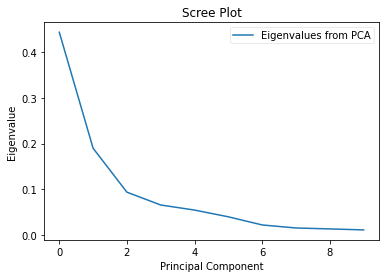

In [ ]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
#Cumulative Variance explains
#var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
#print(var1)

plt.plot(var)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3,shadow=False,markerscale=0.4)
leg.get_frame().set_alpha(0.4)
#leg.draggable(state=True)
plt.show()

OBSERVATION:

The obvious change in the scree plot occurs at component 2 which is the elbow of the scree plot. We can now retain the first three components.

In [ ]:
# Precision / Recall / F1 Score
def show_metrics(y_test, y_pred):
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print(' Precision Score {:.3f}'.format(precision))
    print(' Recall Score {:.3f}'.format(recall))
    print(' F1 Score {:.3f}'.format(f1score))
    print(' Accuracy Score {:.3f}'.format(accuracy))

In [ ]:
# ROC Curve
def plot_roc_curve(y_test, y_pred):
    plt.rcParams['figure.figsize'] = (6,4)
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label = 'ROC Curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
    plt.title('ROC Curve')
    return fpr, tpr

In [ ]:
# Confusion Matrix
def plot_confusion_matrix(y_test, y_pred):
    plt.rcParams['figure.figsize'] = (4, 4)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot = True, linewidths = 0.5)

In [ ]:
# Precision Recall Curve
def plot_precision_recall_metrics(y_test, y_pred):
    plt.rcParams['figure.figsize'] = (6,4)
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
    plt.plot(recall, precision, linewidth = 2)
    plt.fill_between(recall, precision, alpha = 0.2, color = 'b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    return precision, recall

#Model Training

In [ ]:
# Independent & Dependent Variable
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})
X = data.drop('diagnosis', axis = 'columns')
y = data['diagnosis']

In [ ]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#Random Forest Classifier

In [ ]:
# Import Libraries
import IPython
import pandas as pd
import numpy as np

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

from plotly.offline import  init_notebook_mode, iplot
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = "svg"

In [ ]:
# Random Forest Classifier without parameter
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
show_metrics(y_test, rf_pred)

 Precision Score 0.984
 Recall Score 0.952
 F1 Score 0.968
 Accuracy Score 0.977


In [ ]:
# Hyperparameter tunning for Random Forest
params = {
            'n_estimators': [100, 200, 500],
            'max_features': [2, 3],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10]
}
cv = GridSearchCV(estimator = rf_model, param_grid = params, scoring = 'f1', verbose = 10, n_jobs = -1)
cv.fit(X_train, y_train)
print(cv.best_params_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
{'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


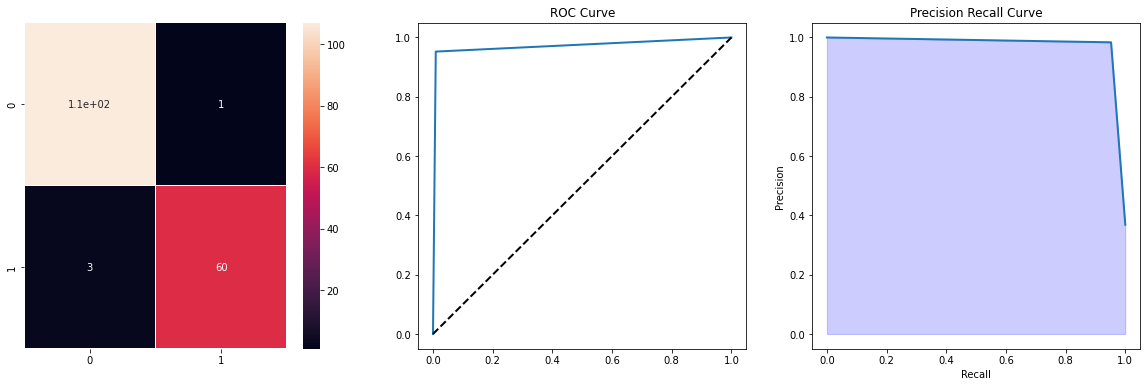

In [ ]:
plt.rcParams['figure.figsize'] = (20, 6)
plt.subplot(131)
plot_confusion_matrix(y_test, rf_pred)

plt.subplot(132)
rf_fpr, rf_tpr = plot_roc_curve(y_test, rf_pred)

plt.subplot(133)
rf_precision, rf_recall = plot_precision_recall_metrics(y_test, rf_pred)

#Logistics Regression

In [ ]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
show_metrics(y_test, lr_pred)

 Precision Score 0.983
 Recall Score 0.937
 F1 Score 0.959
 Accuracy Score 0.971


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
# Hyper parameter tunning
params = {
            'penalty' : ['l1','l2'], 
            'class_weight' : ['balanced', None], 
            'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
cv = GridSearchCV(estimator = lr_model, param_grid = params, n_jobs = -1, scoring = 'f1', verbose = 10)
cv.fit(X_train, y_train)
print(cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'C': 100, 'class_weight': None, 'penalty': 'l2'}


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver

In [ ]:
# Best Hyper parameter
lr_model = LogisticRegression( C = 100, class_weight = None, penalty = 'l2')
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
show_metrics(y_test, lr_pred)

 Precision Score 0.968
 Recall Score 0.952
 F1 Score 0.960
 Accuracy Score 0.971


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



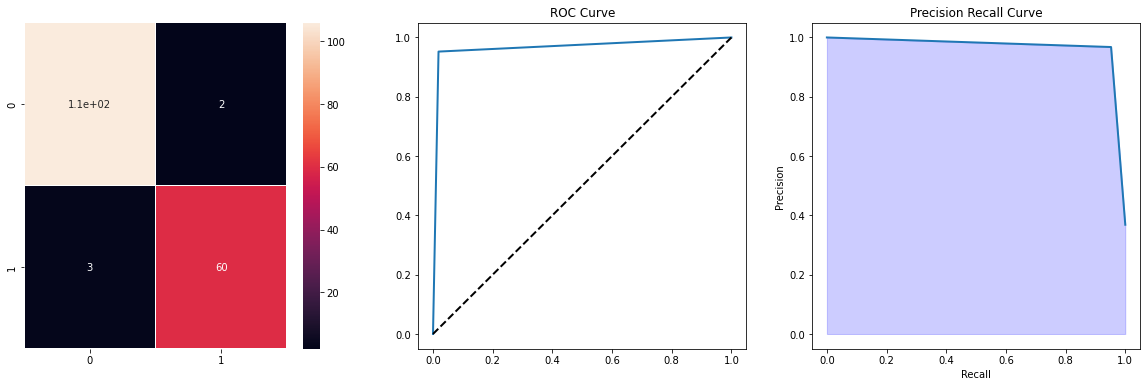

In [ ]:
plt.rcParams['figure.figsize'] = (20, 6)
plt.subplot(131)
plot_confusion_matrix(y_test, lr_pred)

plt.subplot(132)
lr_fpr, lr_tpr = plot_roc_curve(y_test, lr_pred)

plt.subplot(133)
lr_precision, lr_recall = plot_precision_recall_metrics(y_test, lr_pred)

#SVM Classifier

In [ ]:
# SVM 
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
show_metrics(y_test, svm_pred)

 Precision Score 1.000
 Recall Score 0.825
 F1 Score 0.904
 Accuracy Score 0.936


In [ ]:
# SVM : Hyper paramter tunning 
params = [
              {'C': [1, 10, 100, 1000], 
               'kernel': ['linear']
              },
              {'C': [1, 10, 100, 1000], 
               'gamma': [0.001, 0.0001], 
               'kernel': ['rbf']
              },
 ]
cv = GridSearchCV(estimator = svm_model, param_grid = params, n_jobs = -1, verbose = 2, scoring = 'f1')
cv.fit(X_train, y_train)
print(cv.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'C': 10, 'kernel': 'linear'}


In [ ]:
svm_model = SVC(C = 10, kernel = 'linear')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
show_metrics(y_test, svm_pred)

 Precision Score 0.952
 Recall Score 0.952
 F1 Score 0.952
 Accuracy Score 0.965


After the Hyper parameter tuning, the accuracy scrore increased from 0.936 to 0.965

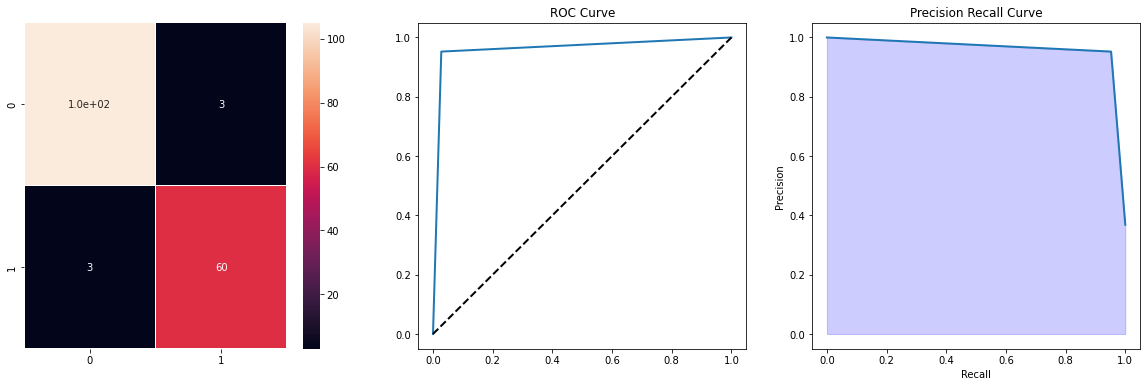

In [ ]:
plt.rcParams['figure.figsize'] = (20, 6)
plt.subplot(131)
plot_confusion_matrix(y_test, svm_pred)

plt.subplot(132)
svm_fpr, svm_tpr = plot_roc_curve(y_test, svm_pred)

plt.subplot(133)
svm_precision, svm_recall = plot_precision_recall_metrics(y_test, svm_pred)

In [ ]:
# Roc curve for all models

def roc_curve_all_models():
    plt.rcParams['figure.figsize'] = (12,8)
    plt.plot(lr_fpr, lr_tpr, label = 'ROC', linewidth = 2)
    plt.plot(rf_fpr, rf_tpr, label = 'ROC', linewidth = 2)
    plt.plot(svm_fpr, svm_tpr, label = 'ROC', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [ ]:
# Precision Recall curve all models

def precision_recall_all_models():
    plt.rcParams['figure.figsize'] = (12,8)
    plt.plot(lr_recall, lr_precision, linewidth = 2)
    plt.plot(rf_recall, rf_precision, linewidth = 2)
    plt.plot(svm_recall, svm_precision, linewidth = 2)
    plt.fill_between(lr_recall, lr_precision, alpha = 0.2, color = 'b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.legend(['Logistic', 'Random Forest', 'SVM'], loc='upper right')

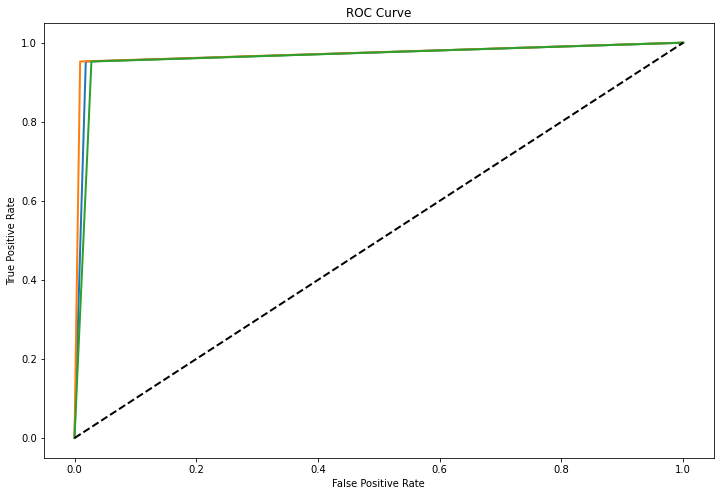

In [ ]:
roc_curve_all_models()

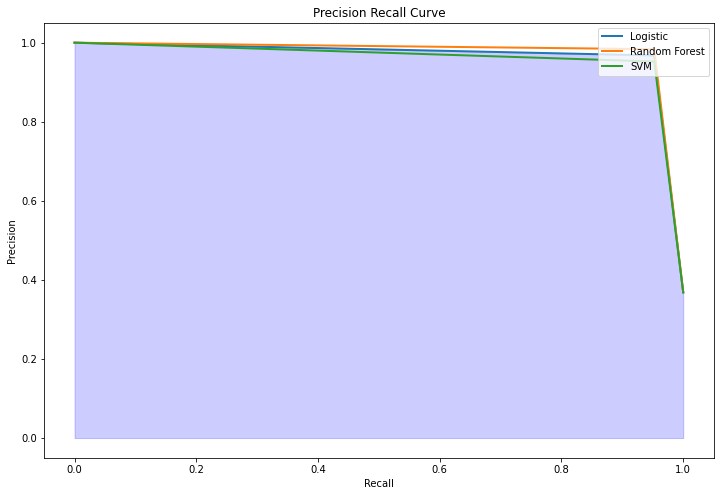

In [ ]:
precision_recall_all_models()

#CONCLUSION:

The machine learning models are created and hyper tuned to achieve the best possible accuracy levels.

Here I have tried the models Logistics Regression, Random Forest and SVM Classifier. The accuracy as follows.

Random Forest Classifier - 0.977
Logistics Regression - 0.971
SVM Accuracy Score - 0.965
